Import the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [ ]:
df = pd.read_csv('Superstore.csv', encoding='latin-1',na_values=["", " ", "NA", "n/a", "null", "--"])
print(df)

      Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
1          2  CA-2016-152156   11/8/2016  11/11/2016    Second Class   
2          3  CA-2016-138688   6/12/2016   6/16/2016    Second Class   
3          4  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
4          5  US-2015-108966  10/11/2015  10/18/2015  Standard Class   
...      ...             ...         ...         ...             ...   
9989    9990  CA-2014-110422   1/21/2014   1/23/2014    Second Class   
9990    9991  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9991    9992  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9992    9993  CA-2017-121258   2/26/2017    3/3/2017  Standard Class   
9993    9994  CA-2017-119914    5/4/2017    5/9/2017    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United 

# Exploring Data

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,0.1600
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,0.3000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,0.4700
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-0.4000
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,0.1125


In [ ]:
df.shape

(9994, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
df.isna().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [ ]:
df['Order Date'].min(), df['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Profit Margin
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896,0.120314
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,-2.750000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750,0.075000
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500,0.270000
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000,0.362500
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000,0.500000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108,0.466754


In [ ]:
df.duplicated().sum()

np.int64(0)

# Let's add some modification

Format date columns

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

Adding new column

In [ ]:
df['Profit Margin'] = df['Profit'] / df['Sales']
print(df['Profit Margin'])

0       0.1600
1       0.3000
2       0.4700
3      -0.4000
4       0.1125
         ...  
9989    0.1625
9990    0.1700
9991    0.0750
9992    0.4500
9993    0.3000
Name: Profit Margin, Length: 9994, dtype: float64


let's find Orders by year and month and day

In [ ]:
df['Orders by Year'] = df['Order Date'].dt.year
df['Orders by Month'] = df['Order Date'].dt.month
df['Orders by Day'] = df['Order Date'].dt.day
print(df['Orders by Year'])
print(df['Orders by Month'])
print(df['Orders by Day'])

0       2016
1       2016
2       2016
3       2015
4       2015
        ... 
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Orders by Year, Length: 9994, dtype: int32
0       11
1       11
2        6
3       10
4       10
        ..
9989     1
9990     2
9991     2
9992     2
9993     5
Name: Orders by Month, Length: 9994, dtype: int32
0        8
1        8
2       12
3       11
4       11
        ..
9989    21
9990    26
9991    26
9992    26
9993     4
Name: Orders by Day, Length: 9994, dtype: int32


Adding new column Profitability

In [ ]:
df['Profitability'] = df['Profit'] / df['Sales']
print(df['Profitability'])

0       0.1600
1       0.3000
2       0.4700
3      -0.4000
4       0.1125
         ...  
9989    0.1625
9990    0.1700
9991    0.0750
9992    0.4500
9993    0.3000
Name: Profitability, Length: 9994, dtype: float64


# Original price, discount, discount percentage and loss

Orginal Price per product Befor discount

In [ ]:
df['Original Price'] = df['Sales'] / (1 - df['Discount'])
print(df['Original Price'])

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9989      31.56
9990      91.96
9991     323.22
9992      29.60
9993     243.16
Name: Original Price, Length: 9994, dtype: float64


Sales without discount

In [ ]:
df['Sales without Discount'] = df['Orginal Price per product'] * df['Quantity']
print(df['Sales without Discount'])

0        261.96
1        731.94
2         14.62
3       1741.05
4         27.96
         ...   
9989      31.56
9990      91.96
9991     323.22
9992      29.60
9993     243.16
Name: Sales without Discount, Length: 9994, dtype: float64


Discount Percentage for one product

In [ ]:
df['Discount percentage for one product'] = df['Discount'] / df['Quantity']
print(df['Discount percentage for one product'])

0       0.000000
1       0.000000
2       0.000000
3       0.090000
4       0.100000
          ...   
9989    0.066667
9990    0.000000
9991    0.100000
9992    0.000000
9993    0.000000
Name: Discount percentage for one product, Length: 9994, dtype: float64


Price per product after Discount

In [ ]:
df['Price per product after Discount'] = df['Sales'] / df['Quantity']
print(df['Price per product after Discount'])

0       130.9800
1       243.9800
2         7.3100
3       191.5155
4        11.1840
          ...   
9989      8.4160
9990     45.9800
9991    129.2880
9992      7.4000
9993    121.5800
Name: Price per product after Discount, Length: 9994, dtype: float64


What we loss after the discount

In [ ]:
df['Loss per product after discount'] = df['Orginal Price per product'] - df['Price per product after Discount']
print(df['Loss per product after discount'])

df['Total Loss after Quantity discount'] = (df['Orginal Price per product'] - df['Price per product after Discount']) * df['Quantity']
print(df['Total Loss after Quantity discount'])

0         0.0000
1         0.0000
2         0.0000
3       156.6945
4         2.7960
          ...   
9989      2.1040
9990      0.0000
9991     32.3220
9992      0.0000
9993      0.0000
Name: Loss per product after discount, Length: 9994, dtype: float64
0         0.0000
1         0.0000
2         0.0000
3       783.4725
4         5.5920
          ...   
9989      6.3120
9990      0.0000
9991     64.6440
9992      0.0000
9993      0.0000
Name: Total Loss after Quantity discount, Length: 9994, dtype: float64


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Orders by Day,Profitability,Original Price,Orginal Price per product,Sales without discount,Sales without Discount,Discount percentage for one product,Price per product after Discount,Loss per product after discount,Total Loss after Quantity discount
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,0.1600,261.96,130.98,261.960000,261.96,0.00,130.9800,0.0000,0.0000
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,8,0.3000,731.94,243.98,731.940000,731.94,0.00,243.9800,0.0000,0.0000
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,12,0.4700,14.62,7.31,14.620000,14.62,0.00,7.3100,0.0000,0.0000
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,-0.4000,1741.05,348.21,526.667625,1741.05,0.09,191.5155,156.6945,783.4725
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,11,0.1125,27.96,13.98,17.894400,27.96,0.10,11.1840,2.7960,5.5920


What are the top selling products in the superstore(Sales)

In [ ]:
top_selling_products = df.groupby('Product Name')['Sales'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(by='Sales', ascending=False)
top_selling_products.head(10)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


Best selling product (Quantity)

In [ ]:
df['Product Name'].value_counts().head(10)

,count
Product Name,
Staple envelope,48
Staples,46
Easy-staple paper,46
Avery Non-Stick Binders,20
Staples in misc. colors,19
KI Adjustable-Height Table,18
Staple remover,18
Storex Dura Pro Binders,17
Staple-based wall hangings,16


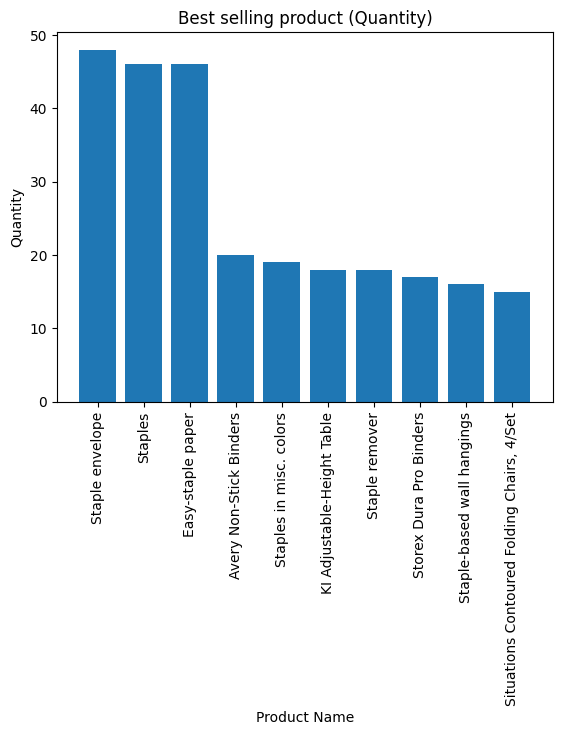

In [ ]:
plt.bar(df['Product Name'].value_counts().head(10).index, df['Product Name'].value_counts().head(10).values)
plt.xlabel('Product Name')
plt.ylabel('Quantity')
plt.title('Best selling product (Quantity)')
plt.xticks(rotation=90)
plt.show()

What is the sales trend over time (monthly, yearly)

monthly_sales:
    Orders by Year  Orders by Month        Sales
0             2014                1   14236.8950
1             2014                2    4519.8920
2             2014                3   55691.0090
3             2014                4   28295.3450
4             2014                5   23648.2870
5             2014                6   34595.1276
6             2014                7   33946.3930
7             2014                8   27909.4685
8             2014                9   81777.3508
9             2014               10   31453.3930
10            2014               11   78628.7167
11            2014               12   69545.6205
12            2015                1   18174.0756
13            2015                2   11951.4110
14            2015                3   38726.2520
15            2015                4   34195.2085
16            2015                5   30131.6865
17            2015                6   24797.2920
18            2015                7   28765.3250
19   

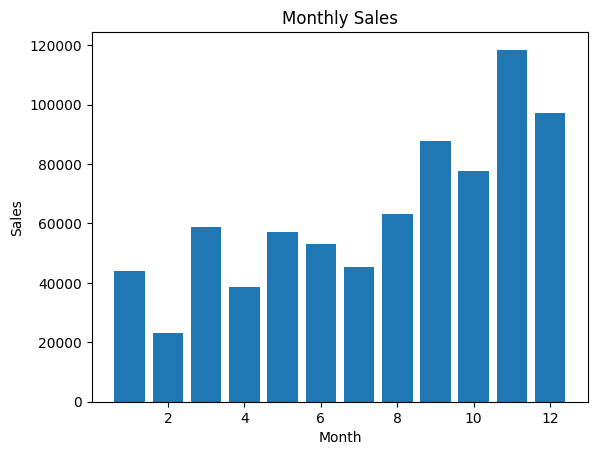

In [ ]:
monthly_sales = df.groupby(['Orders by Year', 'Orders by Month'])['Sales'].sum().reset_index()
print("monthly_sales:")
print(monthly_sales)

plt.bar(monthly_sales['Orders by Month'], monthly_sales['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales')
plt.show()

yearly_sales:
   Orders by Year        Sales
0            2014  484247.4981
1            2015  470532.5090
2            2016  609205.5980
3            2017  733215.2552


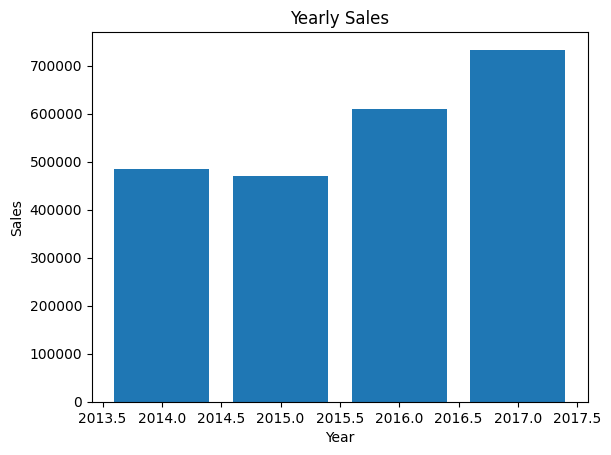

In [ ]:
yearly_sales = df.groupby('Orders by Year')['Sales'].sum().reset_index()
print("yearly_sales:")
print(yearly_sales)

plt.bar(yearly_sales['Orders by Year'], yearly_sales['Sales'])
plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Yearly Sales')
plt.show()

Category of products generating the highest revenue and profit

In [ ]:
df.groupby('Category')['Sales'].sum().reset_index()

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


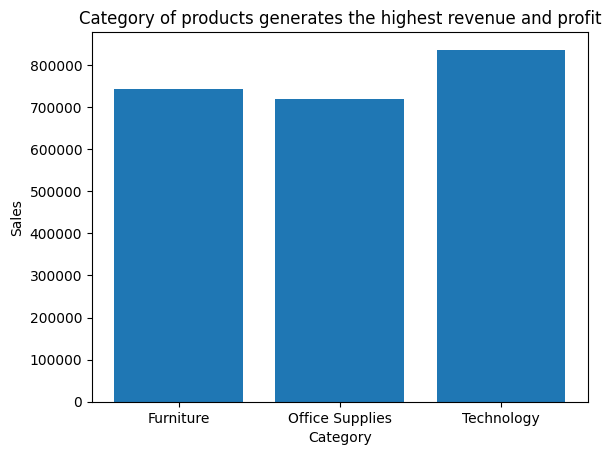

In [ ]:
plt.bar(df.groupby('Category')['Sales'].sum().index, df.groupby('Category')['Sales'].sum().values)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Category of products generates the highest revenue and profit')
plt.show()

In [ ]:
category_revenue_profit = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
highest_revenue_profit = category_revenue_profit.sort_values(by='Profit', ascending=False).iloc[0]
print("Category generating the highest revenue and profit:")
print(highest_revenue_profit)

Category generating the highest revenue and profit:
Category     Technology
Sales        836154.033
Profit      145454.9481
Name: 2, dtype: object


Region generating the most sales

In [ ]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
highest_sales_region = sales_by_region.sort_values(by='Sales', ascending=False).iloc[0]
print("Region generating the most sales:")
print(highest_sales_region)

Region generating the most sales:
Region           West
Sales     725457.8245
Name: 3, dtype: object


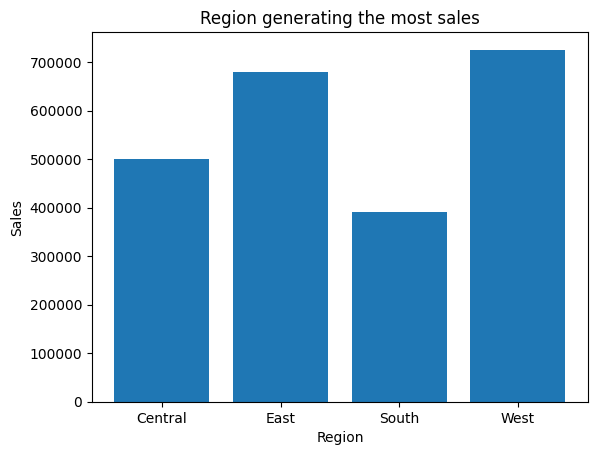

In [ ]:
plt.bar(sales_by_region['Region'], sales_by_region['Sales'])
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Region generating the most sales')
plt.show()

Impact of discounts and promotions on sales

In [ ]:
sales_by_discount = df.groupby('Discount')['Sales'].sum().reset_index()
print("sales_by_discount:")
print(sales_by_discount)

sales_by_discount:
    Discount         Sales
0       0.00  1.087908e+06
1       0.10  5.436935e+04
2       0.15  2.755852e+04
3       0.20  7.645944e+05
4       0.30  1.032267e+05
5       0.32  1.449346e+04
6       0.40  1.164178e+05
7       0.45  5.484974e+03
8       0.50  5.891854e+04
9       0.60  6.644700e+03
10      0.70  4.062028e+04
11      0.80  1.696376e+04


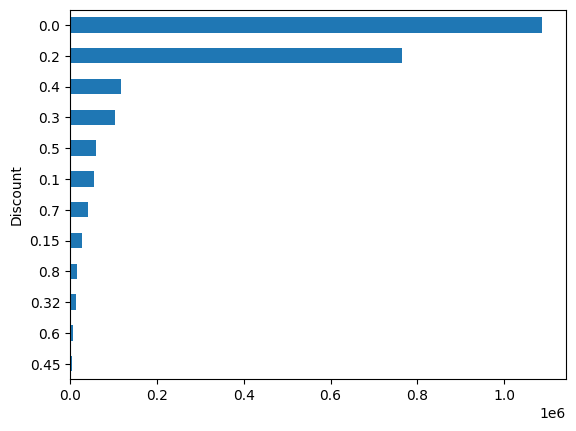

In [ ]:
sales_by_discount = df.groupby('Discount')['Sales'].sum().sort_values(ascending = True).plot.barh()

In [ ]:
profit_by_discount = df.groupby('Discount')['Profit'].sum().reset_index()
print("profit_by_discount:")
print(profit_by_discount)

profit_by_discount:
    Discount       Profit
0       0.00  320987.6032
1       0.10    9029.1770
2       0.15    1418.9915
3       0.20   90337.3060
4       0.30  -10369.2774
5       0.32   -2391.1377
6       0.40  -23057.0504
7       0.45   -2493.1111
8       0.50  -20506.4281
9       0.60   -5944.6552
10      0.70  -40075.3569
11      0.80  -30539.0392


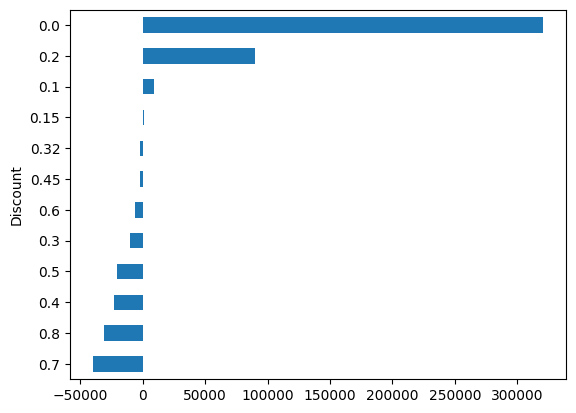

In [ ]:
profit_by_discount = df.groupby('Discount')['Profit'].sum().sort_values(ascending = True).plot.barh()

The best sales are when the discount is 50% but this is non-profitability but the discount from 10% to 20% are the best solution

Sub-category of products with highest demand

In [ ]:
Subcategory_highest_demand = df.groupby('Sub-Category')['Sales'].sum().reset_index()
print("Sub-category of products with highest demand:")
print(Subcategory_highest_demand.sort_values(by='Sales', ascending=False))

Sub-category of products with highest demand:
   Sub-Category        Sales
13       Phones  330007.0540
5        Chairs  328449.1030
14      Storage  223843.6080
16       Tables  206965.5320
3       Binders  203412.7330
11     Machines  189238.6310
0   Accessories  167380.3180
6       Copiers  149528.0300
4     Bookcases  114879.9963
1    Appliances  107532.1610
9   Furnishings   91705.1640
12        Paper   78479.2060
15     Supplies   46673.5380
2           Art   27118.7920
7     Envelopes   16476.4020
10       Labels   12486.3120
8     Fasteners    3024.2800


<Axes: ylabel='Sub-Category'>

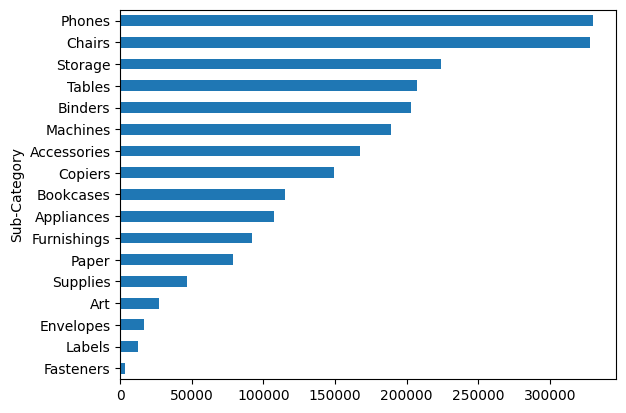

In [ ]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending = True).plot.barh()

In [ ]:
df.to_csv('Superstore_analysis.csv', index=False)